# 데이터 전처리
- 날짜데이터 처리
- 파생변수 생성 / 결측값 처리
- 데이터 재구조화 / 병합

In [45]:
import pandas as pd

In [46]:
df1 = pd.read_csv('01_Data.csv')
df1.head(3)

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,개인,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행


In [47]:
# 날짜 데이터 변환
df1['Datetime_dt'] = pd.to_datetime(df1['Datetime'])
# Datetime 데이터를 날짜형식의 데이터로 변환하여,
# df1 데이터 프레임에 새로운 Datetime_df 변수로 선언

In [48]:
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank,Datetime_dt
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고,2019-05-06
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드,2020-02-20
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행,2019-02-28
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합,2019-05-13
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합,2019-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,47.0,경기도,경기도,계약확정,0,없음,남자,NaN,기업은행,2019-03-01
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,42.0,경기도,경기도,계약확정,0,없음,여자,8.0,새마을금고,2019-04-01
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,65.0,서울특별시,서울특별시,계약확정,0,없음,여자,1.0,롯데카드,2019-04-01
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,54.0,서울특별시,서울특별시,계약확정,0,없음,여자,2.0,롯데카드,2020-02-06


In [49]:
df1['Year'] = df1['Datetime_dt'].dt.year # 날짜형식의 데이터에서 연도 추출
df1['Month'] = df1['Datetime_dt'].dt.month # 월 추출
df1['Day'] = df1['Datetime_dt'].dt.day # 일 추출
df1['Day_of_week'] = df1['Datetime_dt'].dt.day_name() # 요일 추출
df1['Week'] = df1['Datetime_dt'].dt.isocalendar().week # 주차 추출

In [50]:
df1.pivot_table(index = 'Product_Type', values = 'Amount_Month',
                columns = 'Year', aggfunc = 'sum').to_excel('result_year.xlsx')

In [51]:
# 파생 변수 생성
# 월렌탈비용(Amount_Month)과 계약기간(Term)을 곱하여, 총계약금액(Total_Amount)을 계산
df1['Total_Amount'] = df1['Amount_Month'] * df1['Term']

In [52]:
# 비교구문과 loc함수를 활용해 데이터를 그룹화
cond1 = (df1['Age'] >= 70)
cond2 = (df1['Age'] >= 60)
cond3 = (df1['Age'] >= 50)
cond4 = (df1['Age'] >= 40)
cond5 = (df1['Age'] < 40)

df1.loc[cond5, '연령대'] = '30대이하'
df1.loc[cond4, '연령대'] = '40대'
df1.loc[cond3, '연령대'] = '50대'
df1.loc[cond2, '연령대'] = '60대'
df1.loc[cond1, '연령대'] = '70대이상'

In [53]:
df1['연령대'].value_counts()

연령대
40대      16283
50대      12522
30대이하     7205
60대       5947
70대이상     2372
Name: count, dtype: int64

In [54]:
# apply() : 파이썬 함수를 활용해 데이터를 처리
def func1(x):
    if x >= 70:
        return '70대이상'
    elif x >= 60:
        return '60대'
    elif x >= 50:
        return '50대'
    elif x < 50:
        return '40대이하'
        
df1['Age'].apply(func1)

0        40대이하
1        40대이하
2        40대이하
3        40대이하
4          60대
         ...  
51296    40대이하
51297    40대이하
51298      60대
51299      50대
51300      50대
Name: Age, Length: 51301, dtype: object

In [55]:
def func2(x):
    return str(x)[0] + '0대'
    
df1['연령대'] = df1['Age'].apply(func2)

In [56]:
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Credit_Rank,Bank,Datetime_dt,Year,Month,Day,Day_of_week,Week,Total_Amount,연령대
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,9.0,새마을금고,2019-05-06,2019,5,6,Monday,19,5814000,40대
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,2.0,현대카드,2020-02-20,2020,2,20,Thursday,8,6174000,30대
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,8.0,우리은행,2019-02-28,2019,2,28,Thursday,9,5814000,40대
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,5.0,농협회원조합,2019-05-13,2019,5,13,Monday,20,802800,30대
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,8.0,농협회원조합,2019-05-10,2019,5,10,Friday,19,802800,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,NaN,기업은행,2019-03-01,2019,3,1,Friday,9,5814000,40대
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,8.0,새마을금고,2019-04-01,2019,4,1,Monday,14,5814000,40대
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,1.0,롯데카드,2019-04-01,2019,4,1,Monday,14,4715100,60대
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,2.0,롯데카드,2020-02-06,2020,2,6,Thursday,6,5814000,50대


- 결측값 확인 및 처리 (Missing Value -> NaN (Not a Number))
- 결측값 제거 : 결측값이 존재하는 행을 제거 (실제 현장에서는 결측값이 많지 않은 이상 결측값 제거 방법을 사용 - 데이터 왜곡 문제 때문)
- 결측값 대치 : 결측값을 다른 값으로 채워넣는 방법
    - 단순대치
    - 알고리즘 대치
    - 보간법

In [57]:
# 결측값 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51301 entries, 0 to 51300
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Index          51301 non-null  int64         
 1   Member_ID      51301 non-null  int64         
 2   Sales_Type     51301 non-null  object        
 3   Contract_Type  51301 non-null  object        
 4   Channel        51301 non-null  object        
 5   Datetime       51301 non-null  object        
 6   Term           51301 non-null  int64         
 7   Payment_Type   51301 non-null  object        
 8   Product_Type   51301 non-null  object        
 9   Amount_Month   51301 non-null  int64         
 10  Customer_Type  51299 non-null  object        
 11  Age            44329 non-null  float64       
 12  Address1       51299 non-null  object        
 13  Address2       51299 non-null  object        
 14  State          51301 non-null  object        
 15  Overdue_count  5130

In [58]:
# 각 항목 별 결측값의 개수
df1.isnull().sum()
# isnull() : 해당 데이터가 결측값인지 아닌지 판별하는 함수

Index               0
Member_ID           0
Sales_Type          0
Contract_Type       0
Channel             0
Datetime            0
Term                0
Payment_Type        0
Product_Type        0
Amount_Month        0
Customer_Type       2
Age              6972
Address1            2
Address2            2
State               0
Overdue_count       0
Overdue_Type        0
Gender              0
Credit_Rank      8781
Bank             2759
Datetime_dt         0
Year                0
Month               0
Day                 0
Day_of_week         0
Week                0
Total_Amount        0
연령대                 0
dtype: int64

In [59]:
# 결측값 제거
df1_clean = df1.dropna()
df1_clean

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Credit_Rank,Bank,Datetime_dt,Year,Month,Day,Day_of_week,Week,Total_Amount,연령대
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,9.0,새마을금고,2019-05-06,2019,5,6,Monday,19,5814000,40대
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,2.0,현대카드,2020-02-20,2020,2,20,Thursday,8,6174000,30대
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,8.0,우리은행,2019-02-28,2019,2,28,Thursday,9,5814000,40대
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,5.0,농협회원조합,2019-05-13,2019,5,13,Monday,20,802800,30대
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,8.0,농협회원조합,2019-05-10,2019,5,10,Friday,19,802800,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51295,51297,66792261,렌탈,일반계약,홈쇼핑/방송,2019-03-11,60,카드이체,DES-1,96900,...,1.0,롯데카드,2019-03-11,2019,3,11,Monday,11,5814000,40대
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,8.0,새마을금고,2019-04-01,2019,4,1,Monday,14,5814000,40대
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,1.0,롯데카드,2019-04-01,2019,4,1,Monday,14,4715100,60대
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,2.0,롯데카드,2020-02-06,2020,2,6,Thursday,6,5814000,50대


In [60]:
df1_clean.isnull().sum()

Index            0
Member_ID        0
Sales_Type       0
Contract_Type    0
Channel          0
Datetime         0
Term             0
Payment_Type     0
Product_Type     0
Amount_Month     0
Customer_Type    0
Age              0
Address1         0
Address2         0
State            0
Overdue_count    0
Overdue_Type     0
Gender           0
Credit_Rank      0
Bank             0
Datetime_dt      0
Year             0
Month            0
Day              0
Day_of_week      0
Week             0
Total_Amount     0
연령대              0
dtype: int64

In [61]:
# 특정 항목(Column)을 제외한 뒤, 결측값을 제거
df_clean2 = df1.drop(columns = ['Credit_Rank', 'Age']).dropna()
# 결측값 항목이 많은 'Credit_Rank', 'Age' 항목을 제외한 뒤
df_clean2

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Gender,Bank,Datetime_dt,Year,Month,Day,Day_of_week,Week,Total_Amount,연령대
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,여자,새마을금고,2019-05-06,2019,5,6,Monday,19,5814000,40대
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,남자,현대카드,2020-02-20,2020,2,20,Thursday,8,6174000,30대
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,여자,우리은행,2019-02-28,2019,2,28,Thursday,9,5814000,40대
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,남자,농협회원조합,2019-05-13,2019,5,13,Monday,20,802800,30대
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,남자,농협회원조합,2019-05-10,2019,5,10,Friday,19,802800,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,남자,기업은행,2019-03-01,2019,3,1,Friday,9,5814000,40대
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,여자,새마을금고,2019-04-01,2019,4,1,Monday,14,5814000,40대
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,여자,롯데카드,2019-04-01,2019,4,1,Monday,14,4715100,60대
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,여자,롯데카드,2020-02-06,2020,2,6,Thursday,6,5814000,50대


- NaN (Not A Number)
- NA (Not Available)
- None
- Null
- Inf
...

In [62]:
# 결측값 대치 (단순대치) / fillna() : 특정 값으로 결측값을 대치
df1['Credit_Rank_clean1'] = df1['Credit_Rank'].fillna(0)
df1['Credit_Rank_clean1']

0        9.0
1        2.0
2        8.0
3        5.0
4        8.0
        ... 
51296    0.0
51297    8.0
51298    1.0
51299    2.0
51300    8.0
Name: Credit_Rank_clean1, Length: 51301, dtype: float64

In [63]:
# 결측값에 평균 대치 (단순대치)
df1['Credit_Rank'].fillna(df1['Credit_Rank'].mean())

0        9.00000
1        2.00000
2        8.00000
3        5.00000
4        8.00000
          ...   
51296    3.42881
51297    8.00000
51298    1.00000
51299    2.00000
51300    8.00000
Name: Credit_Rank, Length: 51301, dtype: float64

In [64]:
# 결측값에 중앙값 대치 (단순대치)
df1['Credit_Rank'].fillna(df1['Credit_Rank'].median())

0        9.0
1        2.0
2        8.0
3        5.0
4        8.0
        ... 
51296    3.0
51297    8.0
51298    1.0
51299    2.0
51300    8.0
Name: Credit_Rank, Length: 51301, dtype: float64

- 데이터 병합 (Table Join)

In [65]:
df_product = pd.read_csv('2_store_product.csv')
df_member = pd.read_csv('1_store_member.csv')

In [66]:
df_product.head(3)

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0
1,20170201,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0
2,20170201,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0


In [67]:
df_member.head(3)

,회원번호,회원상태,성별,결혼유무,주소,생년,연령
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46


In [68]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735783 entries, 0 to 735782
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      735783 non-null  int64  
 1   물품코드      735783 non-null  int64  
 2   물품대분류     735783 non-null  object 
 3   물품중분류     735783 non-null  object 
 4   물품소분류     735783 non-null  object 
 5   물품명       735783 non-null  object 
 6   구매수량      735783 non-null  float64
 7   구매금액      735783 non-null  int64  
 8   구매매장      735783 non-null  object 
 9   반품_원거래일자  10337 non-null   float64
 10  회원번호      735761 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 61.7+ MB


In [69]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회원번호    4396 non-null   int64 
 1   회원상태    4396 non-null   object
 2   성별      4396 non-null   object
 3   결혼유무    3449 non-null   object
 4   주소      4396 non-null   object
 5   생년      4396 non-null   int64 
 6   연령      4396 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 240.5+ KB


- 고객의 구매정보를 활용해, 한 명의 고객에 대한 구매금액, 방문횟수, 구매수량 등을 계산하여 고객의 인구통계학적 특성과 결합해 분석

In [70]:
# 1. 구매 데이터에서 고객의 구매금액, 방문횟수, 구매수량과 같은 통계량을 계산
p1 = df_product.pivot_table(index = '회원번호',
                       values = ['구매금액', '구매수량'], aggfunc = 'sum').reset_index()
# reset_index() : pivot table의 결과로 index로 잡혀진 데이터를 다시 index를 정렬하여 데이터로 활용할 수 있게 변경 (index 재정렬)

In [71]:
# 항목명 변경
p2 = p1.rename(columns = {'구매금액' : '총구매금액', '구매수량' : '총구매수량'})
p2

,회원번호,총구매금액,총구매수량
0,2101.0,1991230,382.0
1,2102.0,2095860,472.5
2,2103.0,8273550,1675.4
3,2104.0,6289495,1401.8
4,2105.0,3067930,602.0
...,...,...,...
4280,6492.0,51550,10.0
4281,6493.0,22500,3.0
4282,6494.0,18500,3.0
4283,6495.0,5300,1.0


In [72]:
df_member

,회원번호,회원상태,성별,결혼유무,주소,생년,연령
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70
...,...,...,...,...,...,...,...
4391,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963,55
4392,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982,36
4393,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975,43
4394,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961,57


In [73]:
# 두 데이터 테이블 병합
m1 = pd.merge(df_member, p2, on = '회원번호', how = 'inner')
m1.head(3)

,회원번호,회원상태,성별,결혼유무,주소,생년,연령,총구매금액,총구매수량
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,1991230,382.0
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,2095860,472.5
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,8273550,1675.4


In [74]:
# 한 명의 회원이 몇 번 방문했는지 계산
df_product['Label'] = 1

In [75]:
p3 = df_product.pivot_table(index = ['회원번호', '공급일자'],
                            values = 'Label', aggfunc = 'min').reset_index()
p4 = p3.pivot_table(index = '회원번호', values = 'Label', aggfunc = 'sum').reset_index()
p5 = p4.rename(columns = {'Label' : '총방문횟수'})

In [76]:
# 방문횟수를 계산한 p5 데이터와 기존에 병합된 m1 데이터를 병합
df2 = pd.merge(m1, p5, on = '회원번호', how = 'inner')
df2.head(3)

,회원번호,회원상태,성별,결혼유무,주소,생년,연령,총구매금액,총구매수량,총방문횟수
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,1991230,382.0,86
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,2095860,472.5,79
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,8273550,1675.4,126


# Mission
- df2 데이터를 이용해 아래의 문제를 해결하고자 한다.
1. '총구매금액'이 높은 상위 100명의 고객 명단을 추출하여, result_member_vip.xlsx로 저장
2. '성별'에 따른 '총구매금액'의 합을 비교하고자 한다. '성별' 별 '총구매금액'의 합을 Table로 계산하시오.
3. '총구매금액'을 '총방문횟수'로 나누어, '1회방문시구매금액'이라는 파생변수를 생성하시오.
4. '결혼유무'에서 '기혼'에 해당하는 고객들을 추출하여, '총방문횟수'가 높은 상위 50명의 고객 명단을 뽑아 해당 고객들의 '총구매금액'과 '총구매수량'의 평균/표준편차/중앙값을 계산하시오.

In [77]:
df2.sort_values(by = '총구매금액', ascending = False).head(100).to_excel('result_member_vip.xlsx')

In [78]:
df2.pivot_table(index = '성별', values = '총구매금액', aggfunc = 'sum')

,총구매금액
성별,
남,250926387
여,3925957601


In [79]:
df2['1회방문시구매금액'] = df2['총구매금액'] / df2['총방문횟수']
df2['1회방문시구매금액'].describe()

count      4285.000000
mean      32913.468270
std       25756.734483
min           0.000000
25%       15890.476190
50%       27166.666667
75%       43080.140845
max      329260.000000
Name: 1회방문시구매금액, dtype: float64

In [80]:
df_list1 = df2.loc[df2['결혼유무'] == '기혼'].sort_values(by = '총구매금액', ascending = False).head(50)
df_list1[['총구매금액', '총구매수량']].describe()

,총구매금액,총구매수량
count,5.000000e+01,50.000000
mean,1.081068e+07,2092.149400
std,4.515267e+06,893.730378
min,6.488300e+06,953.900000
25%,7.387221e+06,1428.475000
50%,8.929285e+06,1686.900000
75%,1.355623e+07,2819.825000
max,2.195063e+07,4425.700000


In [81]:
import matplotlib as mpl # 그래프 옵션 (글꼴)
import matplotlib.pyplot as plt # 그래프 옵션 (그래프축 / 범례 / 제목 / 사이즈 / ...)
import seaborn as sns # 시각화

In [84]:
# 한글 글꼴 설정
mpl.rc('font', family = 'Malgun Gothic')

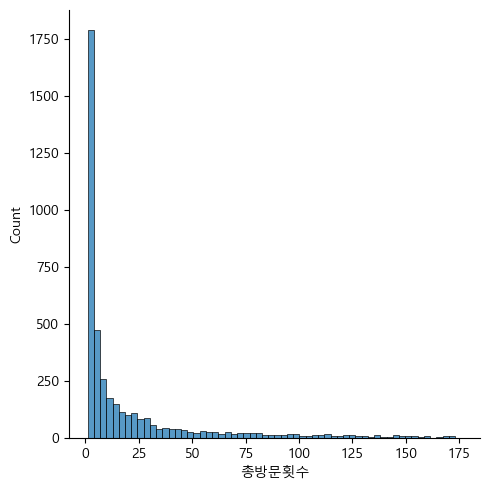

In [86]:
# 단일변수 시각화 (연속형 - 히스토그램)
sns.displot(data = df2, x = '총방문횟수')
plt.savefig('image1.png') # image1.png 파일이름으로 그래프를 저장

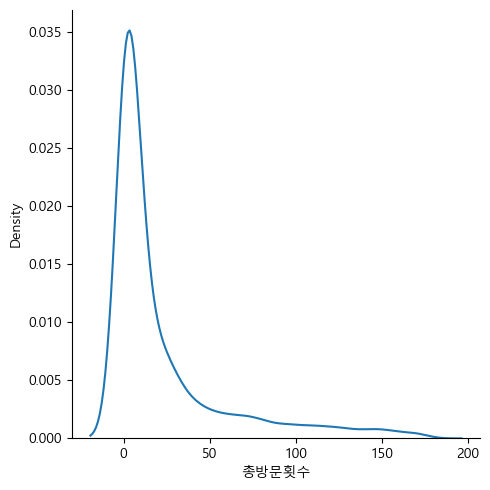

In [87]:
# 연속형 - 확률밀도함수 그래프 KDE
sns.displot(data = df2, x = '총방문횟수', kind = 'kde')

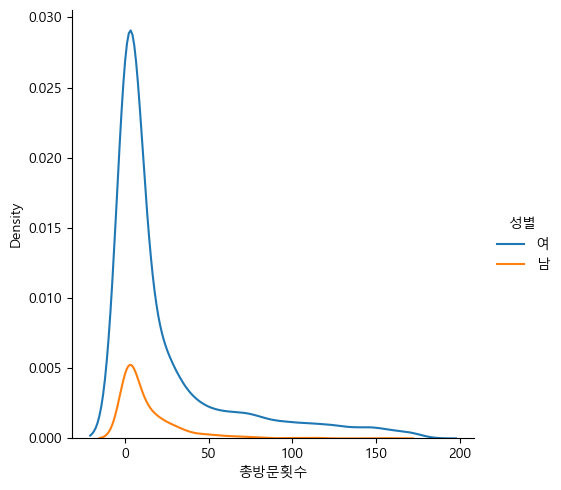

In [88]:
# 그래프 중첩 (Overlay) -> hue
sns.displot(data = df2, x = '총방문횟수', kind = 'kde', hue = '성별')

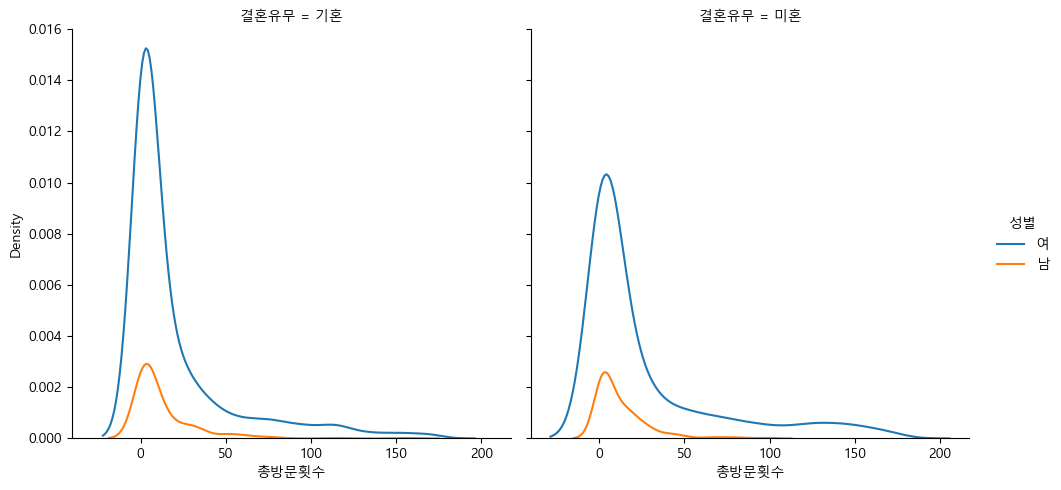

In [89]:
# 그래프 분할 (Subplot)
sns.displot(data = df2, x = '총방문횟수', kind = 'kde', hue = '성별', col = '결혼유무')